# MINI PROJECT

## TELCO CUSTOMER CHURN PREDICTION

#### SECTION 3 - HYPERPARAMETER TUNING

Tujuan kali ini ialah untuk mencari parameter terbaik untuk model machine learning.

## IMPORT LIBRARY

In [1]:
# import library yg diperlukan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#library untuk modeling
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz

# import library ensemble
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, StackingClassifier, GradientBoostingClassifier

#library untuk model evaluation
from sklearn.metrics import confusion_matrix, classification_report, recall_score, roc_curve, roc_auc_score

#library untuk hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

## OVERVIEW

In [2]:
#load data
df_log = pd.read_csv("df_ready_log.csv")
df_dec = pd.read_csv("df_ready_dec.csv")

In [3]:
df_log.head()

,TotalCharges,tenure,MonthlyCharges,Contract_Month-to-month,gender_Male,OnlineSecurity_No,Partner_Yes,PaymentMethod_Electronic check,PaperlessBilling_Yes,TechSupport_No,Churn
0,0.003437,0.013889,0.115423,1,0,1,1,1,1,1,0
1,0.217564,0.472222,0.385075,0,1,0,0,0,0,1,0
2,0.012453,0.027778,0.354229,1,1,0,0,0,1,1,1
3,0.211951,0.625000,0.239303,0,1,0,0,0,0,0,0
4,0.017462,0.027778,0.521891,1,0,1,0,1,1,1,1


In [4]:
df_dec.head()

,tenure,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependent_Yes,PhoneService_Yes,PaperlessBilling_Yes
0,1,29.85,29.85,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
1,34,56.95,1889.50,0,1,0,0,1,0,0,...,0,0,0,1,1,0,0,0,1,0
2,2,53.85,108.15,1,1,0,0,1,0,0,...,0,0,0,1,1,0,0,0,1,1
3,45,42.30,1840.75,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,1,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,1


## MODELING

### LOGISTIC REGRESSION

In [5]:
# split target variable
X = df_log.drop(columns = 'Churn')
y = df_log['Churn']

In [6]:
# train testsplit
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0) # size test = 20%

In [7]:
# model train dan fitting
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
# buat ypredict
y_pred = model.predict(X_test)

In [9]:
# buat df untuk store hasil actual vs pred
result = pd.DataFrame()
result["y_act"] = y_test
result["y_pred"] = y_pred

In [10]:
#concat result
result = pd.concat([X_test, result], axis = 1)

In [11]:
#cek hasil
result.head()

,TotalCharges,tenure,MonthlyCharges,Contract_Month-to-month,gender_Male,OnlineSecurity_No,Partner_Yes,PaymentMethod_Electronic check,PaperlessBilling_Yes,TechSupport_No,y_act,y_pred
2200,0.120354,0.263889,0.397512,0,0,1,0,1,0,1,0,0
4627,0.811706,0.833333,0.978607,0,1,0,0,0,1,0,0,0
3225,0.106376,0.180556,0.534328,1,0,0,0,1,1,1,0,1
2828,0.002355,0.013889,0.021891,0,1,0,0,0,0,0,0,0
3768,0.491249,0.763889,0.592040,1,0,1,1,0,1,1,0,0


#### CONFUSION MATRIX

In [12]:
# confusion matrix
print(confusion_matrix(y_test, y_pred))

[[923 118]
 [172 196]]


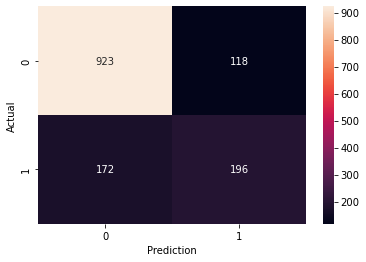

In [13]:
# plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = ".0f")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [14]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1041
           1       0.62      0.53      0.57       368

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409



In [15]:
# fungsi untuk melakukan plot roc auc curve
def plot_roc_curve(true_y, y_prob, labels):
    
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    
    sns.lineplot(fpr, tpr, label = labels)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


model AUC score: 0.7096280750114856



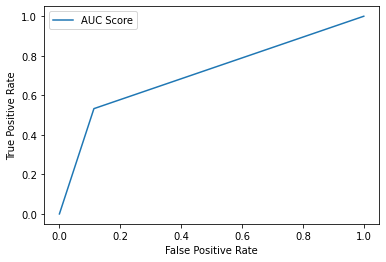

In [16]:
#plot roc auc
plot_roc_curve(y_test, y_pred, 'AUC Score')
print(f"\nmodel AUC score: {roc_auc_score(y_test, y_pred)}\n")
plt.show()

#### CV SCORE

In [17]:
# fungsi untuk cv score
def cv_score(model, data_x, data_y, scoring, n):
    cv = KFold(n_splits=n, shuffle=False)
    scores_train = cross_val_score(model, data_x, data_y, scoring=scoring, cv=cv)
    scores_test = cross_validate(model, data_x, data_y, cv=n)
    
    return scores_train.mean(), scores_test["test_score"].mean()

In [18]:
print("CV Recall :", cv_score(model, X_train, y_train, "recall",5))

CV Recall : (0.5564882588602311, 0.8001434197897245)


### DECISION TREE

In [19]:
# split target variable
X = df_dec.drop(columns = 'Churn')
y = df_dec['Churn']

In [20]:
# train testsplit
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0) # size test = 20%

In [21]:
# model train dan fitting
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
# buat ypredict
y_pred = model.predict(X_test)

In [23]:
# buat df untuk store hasil actual vs pred
result = pd.DataFrame()
result["y_act"] = y_test
result["y_pred"] = y_pred

In [24]:
#concat result
result = pd.concat([X_test, result], axis = 1)

In [25]:
#cek hasil
result.head()

,tenure,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependent_Yes,PhoneService_Yes,PaperlessBilling_Yes,y_act,y_pred
2200,19,58.20,1045.25,1,0,0,1,0,0,1,...,1,0,0,0,0,0,1,0,0,0
4627,60,116.60,7049.50,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
3225,13,71.95,923.85,1,0,0,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
2828,1,20.45,20.45,1,0,0,0,0,1,0,...,0,1,1,0,0,0,1,0,0,0
3768,55,77.75,4266.40,0,0,1,0,1,0,1,...,0,0,0,0,1,0,1,1,0,0


#### CONFUSION MATRIX

In [26]:
# confusion matrix
print(confusion_matrix(y_test, y_pred))

[[837 204]
 [182 186]]


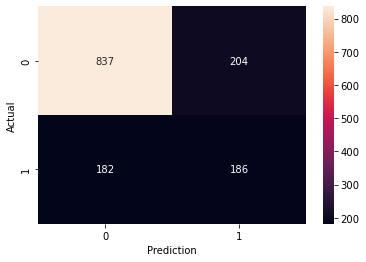

In [27]:
# plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = ".0f")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [28]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1041
           1       0.48      0.51      0.49       368

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409




model AUC score: 0.6547346823706303



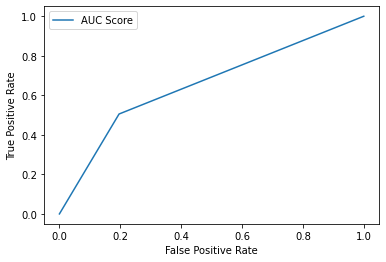

In [29]:
#plot roc auc
plot_roc_curve(y_test, y_pred, 'AUC Score')
print(f"\nmodel AUC score: {roc_auc_score(y_test, y_pred)}\n")
plt.show()

#### CV SCORE

In [30]:
print("CV Recall :", cv_score(model, X_train, y_train, "recall",5))

CV Recall : (0.5042132910918509, 0.7280812796197328)


### GRADIENTBOOSTINGCLASSIFIER

In [31]:
# split target variable
X = df_dec.drop(columns = 'Churn')
y = df_dec['Churn']

In [32]:
# train testsplit
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0) # size test = 20%

In [33]:
# model train dan fitting
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [34]:
# buat ypredict
y_pred = model.predict(X_test)

In [35]:
# buat df untuk store hasil actual vs pred
result = pd.DataFrame()
result["y_act"] = y_test
result["y_pred"] = y_pred

In [36]:
#concat result
result = pd.concat([X_test, result], axis = 1)

In [37]:
#cek hasil
result.head()

,tenure,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependent_Yes,PhoneService_Yes,PaperlessBilling_Yes,y_act,y_pred
2200,19,58.20,1045.25,1,0,0,1,0,0,1,...,1,0,0,0,0,0,1,0,0,0
4627,60,116.60,7049.50,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
3225,13,71.95,923.85,1,0,0,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
2828,1,20.45,20.45,1,0,0,0,0,1,0,...,0,1,1,0,0,0,1,0,0,0
3768,55,77.75,4266.40,0,0,1,0,1,0,1,...,0,0,0,0,1,0,1,1,0,0


#### CONFUSION MATRIX

In [38]:
# confusion matrix
print(confusion_matrix(y_test, y_pred))

[[926 115]
 [190 178]]


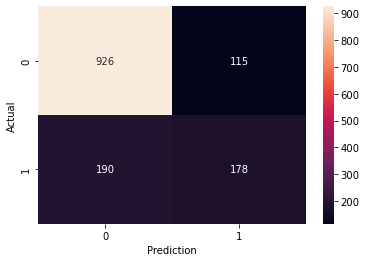

In [39]:
# plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = ".0f")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [40]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1041
           1       0.61      0.48      0.54       368

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.78      1409




model AUC score: 0.686612475462557



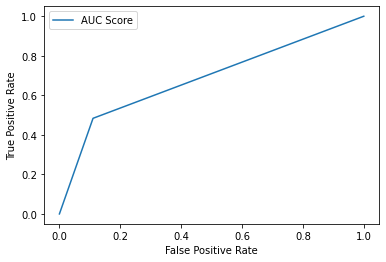

In [41]:
#plot roc auc
plot_roc_curve(y_test, y_pred, 'AUC Score')
print(f"\nmodel AUC score: {roc_auc_score(y_test, y_pred)}\n")
plt.show()

#### CV SCORE

In [42]:
print("CV Recall :", cv_score(model, X_train, y_train, "recall",5))

CV Recall : (0.5401539062397874, 0.807598096772109)


> Kita akan bandingkan score ke3 model sebelum dituning

In [43]:
print("CV Recall Logistic:", cv_score(LogisticRegression(), X_train, y_train, "recall",5))
print("CV Recall DecisionTree:", cv_score(DecisionTreeClassifier(), X_train, y_train, "recall",5))
print("CV Recall GradientBoosting:", cv_score(GradientBoostingClassifier(), X_train, y_train, "recall",5))

CV Recall Logistic: (0.5520228996005578, 0.8029839196470927)
CV Recall DecisionTree: (0.5188977352228097, 0.729499244288031)
CV Recall GradientBoosting: (0.5401539062397874, 0.807598096772109)


## SET PARAMETER FOR HYPERPARAMETER

- LOGISTIC REGRESSION

In [44]:
# parameter logistic regression + nilainya pada tiap parameter dalam bentuk dictionary
log_param = [{'solver' : ['saga'],
          'penalty' : ['elasticnet', 'l1', 'l2', 'none'],
          'max_iter' : [i for i in range (1, 1000)], 
          'C' : [0.01, 0.1, 1], 
          'l1_ratio' : [0,1]},
         
          {'solver' : ['newton-cg', 'lbfgs'],
           'penalty' : ['l2','none'],
           'max_iter' : [i for i in range (1, 1000)],
           'C' : [0.01, 0.1, 1],
           'l1_ratio' : [0,1]}]

- DECISION TREE

In [45]:
# parameter logistic regression + nilainya pada tiap parameter dalam bentuk dictionary
dec_param = [{'criterion' : ['gini', 'entropy'],
          'splitter' : ['best','random'],
          'max_depth' : [2,4,6,8,10,12],
          'min_samples_split' : [i for i in range(1,10)],
          'min_samples_leaf' : [i for i in range(1,10)]}]

- GRADIENTBOOSTINGCLASSIFIER

In [46]:
# parameter GradientBoostingClassifier + nilainya pada tiap parameter dalam bentuk dictionary
gb_param = [{"n_estimators":[i for i in range(1,1000)],
          "max_depth":[3,6,9,12],
          "learning_rate":[0.01,0.1,1,10,100],
          'min_samples_split' : [i for i in range(1,10)],
          'min_samples_leaf' : [i for i in range(1,10)]}]

### RANDOM SEARCH (RANDOMIZED SEARCH CROSS VALIDATION)

#### LOGISTIC

In [47]:
# split target variable
X = df_log.drop(columns = 'Churn')
y = df_log['Churn']

In [48]:
# train testsplit
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0) # size test = 20%

In [49]:
# model train dan fitting
model = LogisticRegression()

In [50]:
# gunakan randomized search CV
model_rs = RandomizedSearchCV(estimator = model, n_iter = 10, param_distributions = log_param, cv = 5, scoring = 'recall')

In [51]:
# fit random search cv
model_rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions=[{'C': [0.01, 0.1, 1],
                                         'l1_ratio': [0, 1],
                                         'max_iter': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                         'penalty': ['elasticnet', 'l1', 'l2',
                                                     'none'],
                                         'solver': ['saga']},
                                        {'C': [0.01, 0.1, 1],
                                         'l1_ratio': [0, 1],
                                         'max_iter': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                         'penalty': ['l2', 'none'],
                                         'solver': ['newton-cg', 'lbfgs']}],
                   scoring='recall')

In [52]:
# hasil best parameter
model_rs.best_params_

{'solver': 'newton-cg',
 'penalty': 'none',
 'max_iter': 75,
 'l1_ratio': 1,
 'C': 1}

In [53]:
# train tuned model( hasil random search cv)
model_rs_tuned = LogisticRegression(solver = 'newton-cg', penalty = 'none', max_iter=875, l1_ratio = 1, C=  0.01)
model_rs_tuned.fit(X_train, y_train)

LogisticRegression(C=0.01, l1_ratio=1, max_iter=875, penalty='none',
                   solver='newton-cg')

##### MODEL EVALUATION

In [54]:
#base model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1041
           1       0.61      0.48      0.54       368

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.78      1409



In [55]:
# hasil tuned model dengan random search cv
y_pred_rs_tuned_log = model_rs_tuned.predict(X_test)
print(classification_report(y_test, y_pred_rs_tuned_log))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1041
           1       0.63      0.53      0.58       368

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409



In [56]:
recall_score(y_test, y_pred_rs_tuned_log)

0.532608695652174

In [57]:
print(f"\nmodel AUC Base : {roc_auc_score(y_test, y_pred)}")
print(f"\nmodel AUC Random : {roc_auc_score(y_test, y_pred_rs_tuned_log)}")


model AUC Base : 0.686612475462557

model AUC Random : 0.7101083824082195


#### DECISION TREE

In [58]:
# split target variable
X = df_dec.drop(columns = 'Churn')
y = df_dec['Churn']

In [59]:
# train testsplit
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0) # size test = 20%

In [60]:
# model train dan fitting
model = DecisionTreeClassifier()

In [61]:
# gunakan randomized search CV
model_rs = RandomizedSearchCV(estimator = model, n_iter = 10, param_distributions = dec_param, cv = 5, scoring = 'recall')

In [62]:
# fit random search cv
model_rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions=[{'criterion': ['gini', 'entropy'],
                                         'max_depth': [2, 4, 6, 8, 10, 12],
                                         'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9],
                                         'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                               7, 8, 9],
                                         'splitter': ['best', 'random']}],
                   scoring='recall')

In [63]:
# hasil best parameter
model_rs.best_params_

{'splitter': 'best',
 'min_samples_split': 6,
 'min_samples_leaf': 7,
 'max_depth': 2,
 'criterion': 'gini'}

In [64]:
# train tuned model( hasil random search cv)
model_rs_tuned = DecisionTreeClassifier(splitter = 'best', min_samples_split = 3, min_samples_leaf=1, max_depth = 2, criterion=  'gini')
model_rs_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_split=3)

##### MODEL EVALUATION

In [65]:
#base model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1041
           1       0.61      0.48      0.54       368

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.78      1409



In [66]:
# hasil tuned model dengan random search cv
y_pred_rs_tuned_dec = model_rs_tuned.predict(X_test)
print(classification_report(y_test, y_pred_rs_tuned_dec))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1041
           1       0.53      0.60      0.56       368

    accuracy                           0.76      1409
   macro avg       0.69      0.71      0.70      1409
weighted avg       0.77      0.76      0.76      1409



In [67]:
recall_score(y_test, y_pred_rs_tuned_dec)

0.5978260869565217

In [68]:
print(f"\nmodel AUC Base : {roc_auc_score(y_test, y_pred)}")
print(f"\nmodel AUC Random : {roc_auc_score(y_test, y_pred_rs_tuned_dec)}")


model AUC Base : 0.686612475462557

model AUC Random : 0.7066940233053501


#### GRADIENTBOOSTINGCLASSIFIER

In [69]:
# split target variable
X = df_dec.drop(columns = 'Churn')
y = df_dec['Churn']

In [70]:
# train testsplit
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0) # size test = 20%

In [71]:
# model train dan fitting
model = GradientBoostingClassifier()

In [72]:
# gunakan randomized search CV
model_rs = RandomizedSearchCV(estimator = model, n_iter = 10, param_distributions = gb_param, cv = 5, scoring = 'recall')

In [73]:
# fit random search cv
model_rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions=[{'learning_rate': [0.01, 0.1, 1, 10,
                                                           100],
                                         'max_depth': [3, 6, 9, 12],
                                         'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9],
                                         'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                               7, 8, 9],
                                         'n_estimators': [1, 2, 3, 4, 5, 6, 7,
                                                          8, 9, 10, 11, 12, 13,
                                                          14, 15, 16, 17, 18,
                                                          19, 20, 21, 22, 23,
                                                          24, 25, 26, 27, 28,
                                                          29, 30, ...]}],
                   scoring='recall')

In [74]:
# hasil best parameter
model_rs.best_params_

{'n_estimators': 677,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_depth': 6,
 'learning_rate': 10}

In [75]:
# train tuned model( hasil random search cv)
model_rs_tuned = GradientBoostingClassifier(n_estimators = 511, max_depth = 6, learning_rate=0.01, min_samples_split = 5, min_samples_leaf=  4)
model_rs_tuned.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=6, min_samples_leaf=4,
                           min_samples_split=5, n_estimators=511)

##### MODEL EVALUATION

In [76]:
#base model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1041
           1       0.61      0.48      0.54       368

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.78      1409



In [77]:
# hasil tuned model dengan random search cv
y_pred_rs_tuned_gb = model_rs_tuned.predict(X_test)
print(classification_report(y_test, y_pred_rs_tuned_gb))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1041
           1       0.60      0.49      0.54       368

    accuracy                           0.78      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



In [78]:
print(f"\nmodel AUC Base : {roc_auc_score(y_test, y_pred)}")
print(f"\nmodel AUC Random : {roc_auc_score(y_test, y_pred_rs_tuned_gb)}")


model AUC Base : 0.686612475462557

model AUC Random : 0.6864480223865013


In [79]:
recall_score(y_test, y_pred_rs_tuned_gb)

0.4891304347826087

> Bandingkan skor ke-3 model

In [80]:
print("Logistic Recall         :", recall_score(y_test, y_pred_rs_tuned_log))
print("Decision Tree Recall    :", recall_score(y_test, y_pred_rs_tuned_dec))
print("GradientBoosting Recall :", recall_score(y_test, y_pred_rs_tuned_gb))

Logistic Recall         : 0.532608695652174
Decision Tree Recall    : 0.5978260869565217
GradientBoosting Recall : 0.4891304347826087
